In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# 1. Defining Problem Statement and Analysing basic metrics

The market research team at AeroFit wants to identify the **characteristics of the target audience for each type of treadmill** offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides **to investigate whether there are differences across the product with respect to customer characteristics**.

In [2]:
df = pd.read_csv("Aerofit Buisness Case Study.csv")

In [3]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There seems to be `Zero Null` Count

In [8]:
df.duplicated().sum()

0

There are no duplicated records

In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Observations
Age:
1. Customers from 18 to 50 years of age use these Products.
2. Most of the Customers are of 24 to 33 years to old.

Education:
1. Customers that use these Products have 12 to 21 years of Education.
2. Most of the Customers had Education 12 to 16 years of Education.

Usage:
1. Customers try to use these Products 2 to 7 times a week.
2. Most of the Customers plan to use the Products either 3 or 4 times a week.

Fitness:
1. Customers using these Products have Fitness level 1-5, 5 being excellent and 1 being poor fitness.
2. Most of the Customers have 3-4 level of Fitness.

Income:
1. Customers using these Products have approx Income band of 30k to 105k.
2. Most of the Customers lie in the 44k to 59k Income band.

Miles
1. Customers using these Products expect to walk 21 to 360 Miles.
2. Most of the Customers expect to walk within 66 to 115 Miles.

In [10]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


##  Observations
1. KP281  is the highest used product
2. Male Customers are more compared to Female
3. Partnered Customers are more compared to Single Customers


# 2. Non-Graphical Analysis: Value counts and unique attributes

In [11]:
cols_list = ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles']

In [12]:
# this function is to bold python output
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

def value_counts_new(d,column_name):
    dum = d[column_name].value_counts().reset_index().sort_values(by=[column_name,'index'],ascending = [False,True]).set_index('index')
    dum.index.name = None
    dum = pd.Series(dum[column_name],index =dum.index )

    return dum

In [13]:
for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Number of unique elements in {i} is:\n {df[i].nunique()}\n')
    print(f'Unique elements present in {i} column is:\n {np.sort(df[i].unique())}\n')
    print(f'Value Counts of {i} columns is:\n{value_counts_new(df,i)}\n\n\n')

PRODUCT:
Number of unique elements in Product is:
 3

Unique elements present in Product column is:
 ['KP281' 'KP481' 'KP781']

Value Counts of Product columns is:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64



AGE:
Number of unique elements in Age is:
 32

Unique elements present in Age column is:
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50]

Value Counts of Age columns is:
25    25
23    18
24    12
26    12
28     9
33     8
35     8
21     7
22     7
27     7
30     7
38     7
29     6
31     6
34     6
20     5
40     5
19     4
32     4
37     2
45     2
47     2
48     2
18     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
50     1
Name: Age, dtype: int64



GENDER:
Number of unique elements in Gender is:
 2

Unique elements present in Gender column is:
 ['Female' 'Male']

Value Counts of Gender columns is:
Male      104
Female     76
Name: Gender, dtype: int64



EDUCATION:
Number of u

In [14]:
df['Product'].value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

## Observations

Product:
1. Only Half of the Customers that use KP281 use KP781.
2. 4/9th, 3/9th, 2/9th are the number of records for KP281,KP481 and KP781 respectively.

Age:
1. 45% of Customers are early twenties

Education:
1. Most of the Customers had 16 years followed by 14 years of Education

Marital Status:
1. Most of the Customer that use these Products are Partnered

Usage:
1. Most of the Customer use the Product 3 to 4times a week

Fitness:
1. Most of the Customers are of average Fitness Level
2. 1/6th of the Customers in this dataset are in excellent shape


# 3. Visual Analysis - Univariate & Bivariate

## Univariate Analysis

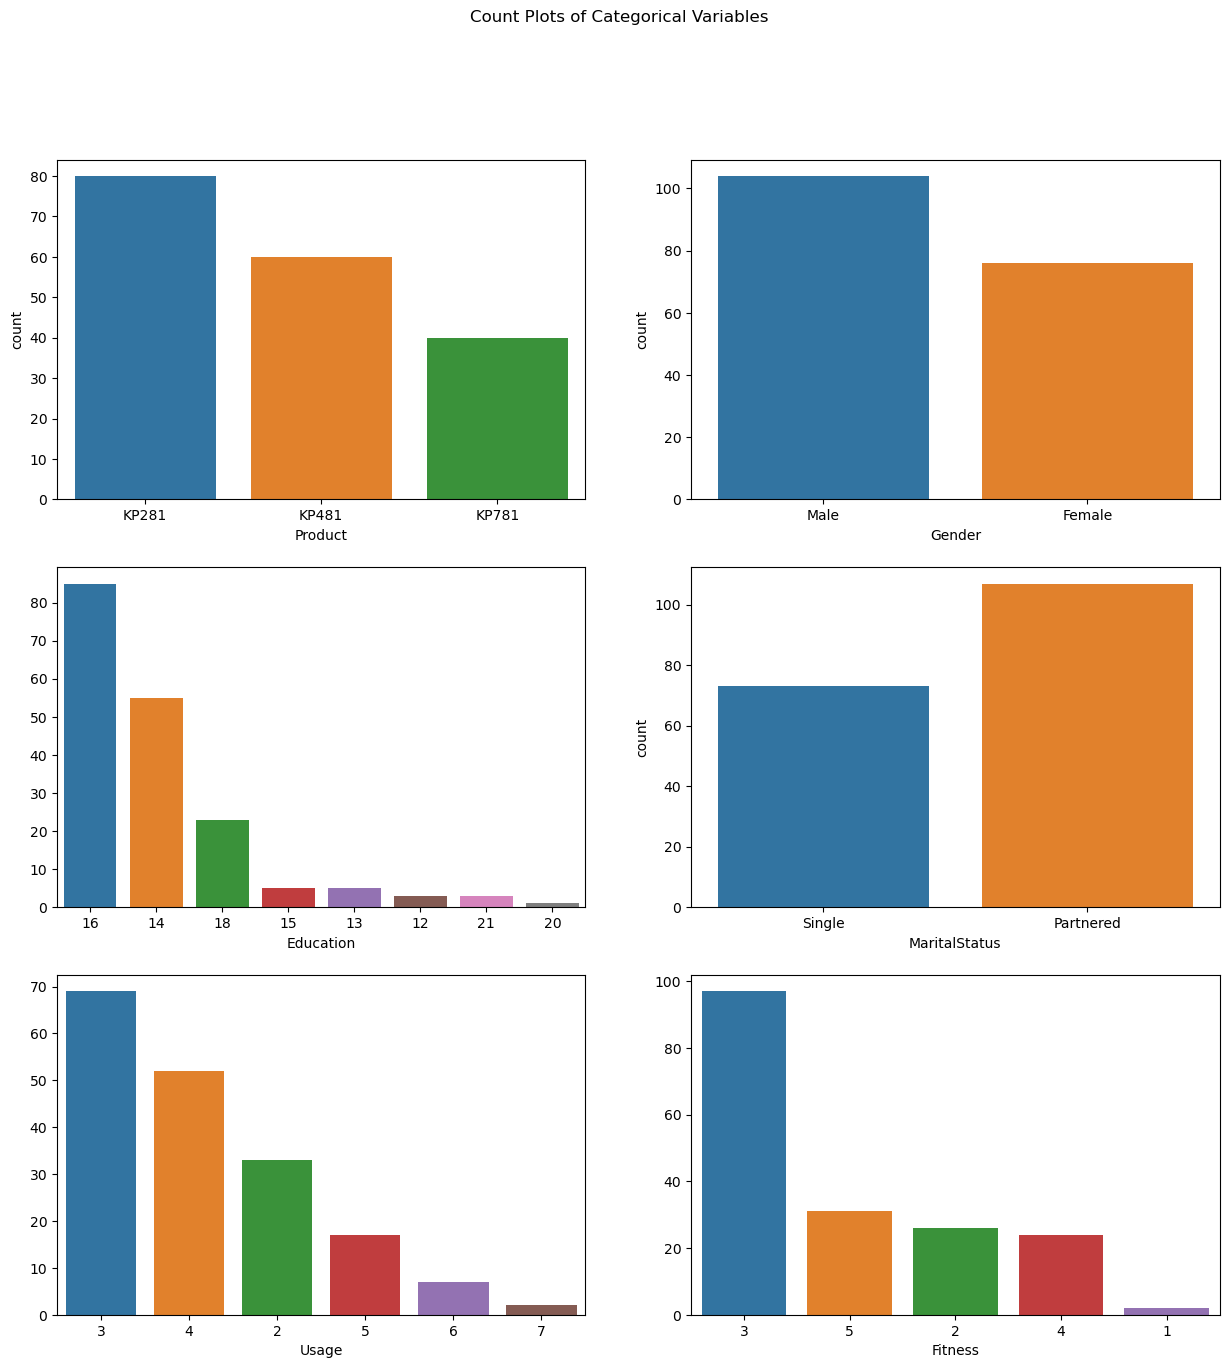

In [15]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(data = df,x = 'Product')

plt.subplot(3,2,2)
sns.countplot(data = df,x = 'Gender')

plt.subplot(3,2,3)
edu = df['Education'].value_counts()
sns.barplot(x = edu.index,y = edu,order = edu.index)
plt.xlabel('Education')
plt.ylabel('')

plt.subplot(3,2,4)
sns.countplot(data = df,x = 'MaritalStatus')

plt.subplot(3,2,5)
us = df['Usage'].value_counts()
sns.barplot(y = us,x = us.index, order = us.index)
plt.xlabel('Usage')
plt.ylabel('')

plt.subplot(3,2,6)
fit = df['Fitness'].value_counts()
sns.barplot(y = fit,x = fit.index, order = fit.index)
plt.xlabel('Fitness')
plt.ylabel('')

plt.suptitle("Count Plots of Categorical Variables")
plt.show()

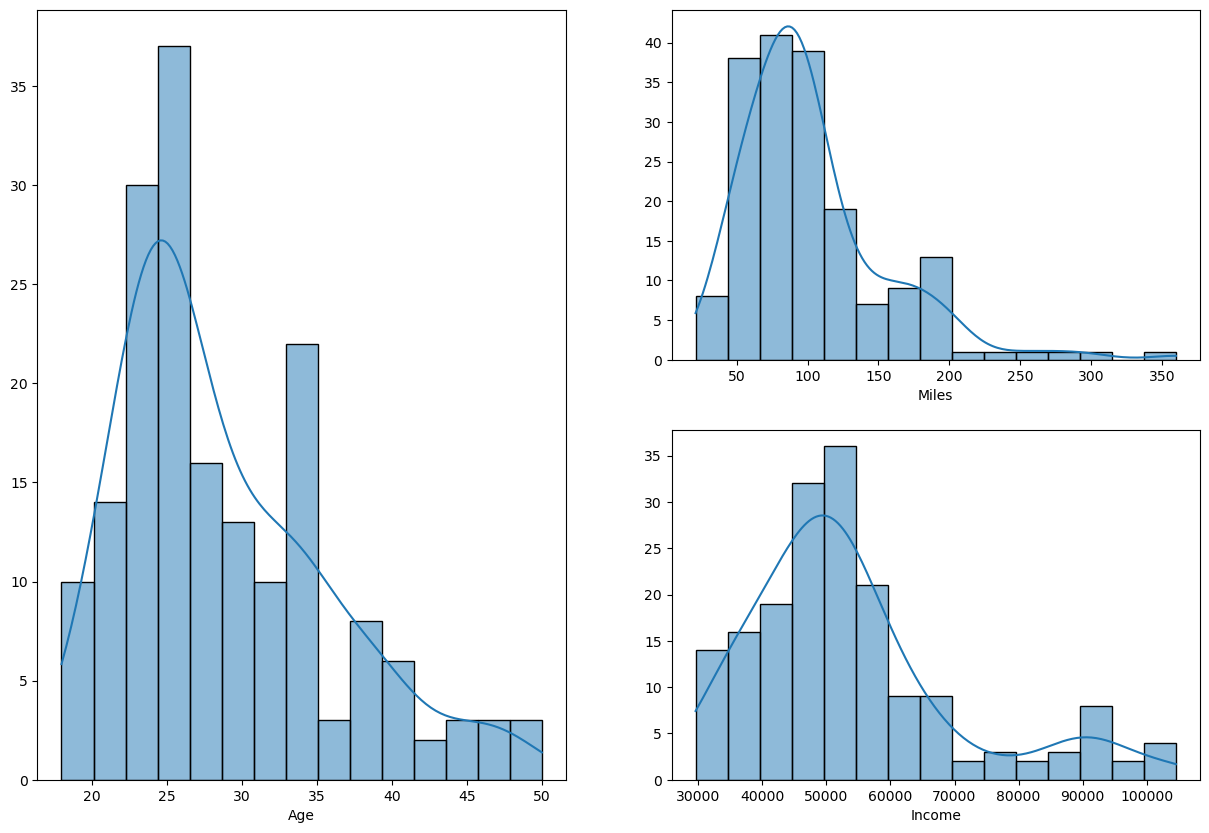

In [16]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data = df, x= 'Age',kde = True,bins = 15)
# sns.lineplot(x = [24,24],y = [0,37],color = 'red',estimator=None,linewidth = 1.5)
plt.ylabel('')


plt.subplot(2,2,2)
sns.histplot(data = df, x= 'Miles',kde = True,bins = 15)
plt.ylabel('')

plt.subplot(2,2,4)
sns.histplot(data = df, x= 'Income',kde = True,bins = 15)
plt.ylabel('')

plt.show()

In [17]:
(df['Gender'] == 'Female').sum()/(df['Gender'] == 'Male').sum()

0.7307692307692307

### Observations
1. All the Numerical Variables are Postively Skewed
2. Female to Male ratio is around 73%
3. Most of the Customers that use the dataset had 16 years of Education
4. Most of the Customers are Partnered
5. Most of the Customers try to use the Products 3 or 4 times a week
6. Most of the Customers have an average level of fitness
7. Most used Product is KP281 followed by KP481 and by KP781

## Bivariate Analysis

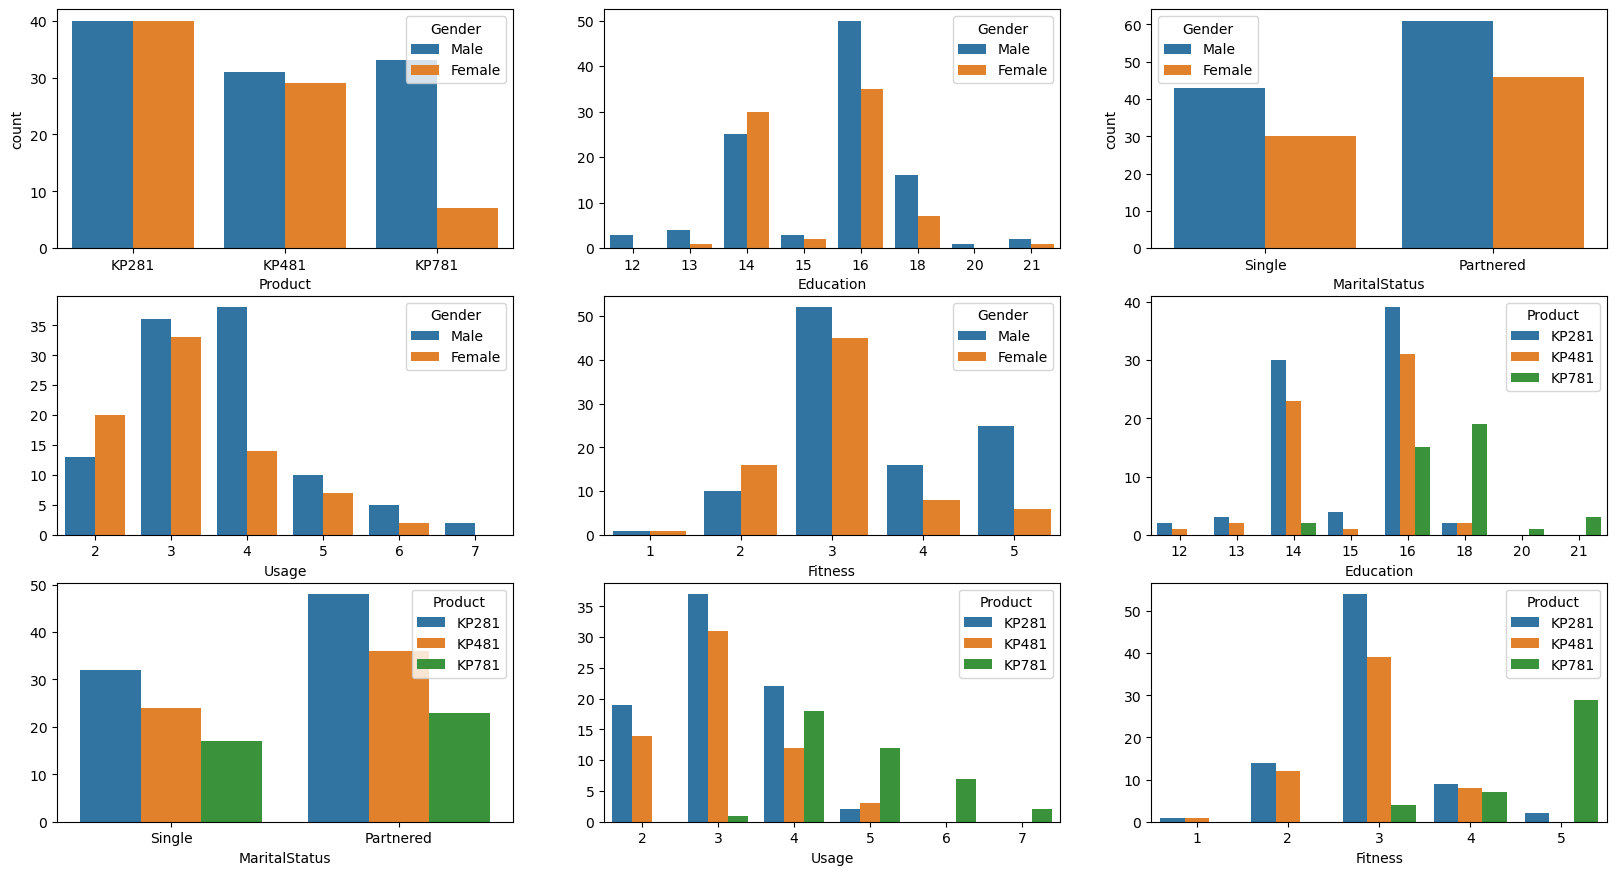

In [18]:
plt.figure(figsize = (20,18))

plt.subplot(5,3,1)
sns.countplot(data = df,x = 'Product',hue = 'Gender')


plt.subplot(5,3,2)
edu = df['Education'].value_counts()
sns.countplot(df,x = 'Education',hue = 'Gender' )
plt.xlabel('Education')
plt.ylabel('')

plt.subplot(5,3,3)
sns.countplot(data = df,x = 'MaritalStatus',hue = 'Gender')

plt.subplot(5,3,4)
us = df['Usage'].value_counts()
sns.countplot(data = df,x = 'Usage',hue = 'Gender')
plt.xlabel('Usage')
plt.ylabel('')

plt.subplot(5,3,5)
fit = df['Fitness'].value_counts()
sns.countplot(data = df,x = 'Fitness',hue = 'Gender')
plt.xlabel('Fitness')
plt.ylabel('')


plt.subplot(5,3,6)
edu = df['Education'].value_counts()
sns.countplot(data = df,x = 'Education',hue = 'Product')
plt.xlabel('Education')
plt.ylabel('')

plt.subplot(5,3,7)
sns.countplot(data = df,x = 'MaritalStatus',hue = 'Product',)
plt.ylabel('')

plt.subplot(5,3,8)
usage = df['Usage'].value_counts()
sns.countplot(data = df,x = 'Usage',hue = 'Product')
plt.xlabel('Usage')
plt.ylabel('')


plt.subplot(5,3,9)
fit = df['Fitness'].value_counts()
sns.countplot(data = df,x = 'Fitness',hue = 'Product')
plt.xlabel('Fitness')
plt.ylabel('')


# plt.subplot(5,3,10)
# sns.barplot(df,y = 'Income',x = 'Gender',hue = 'Product')
# plt.ylabel('')

plt.show()

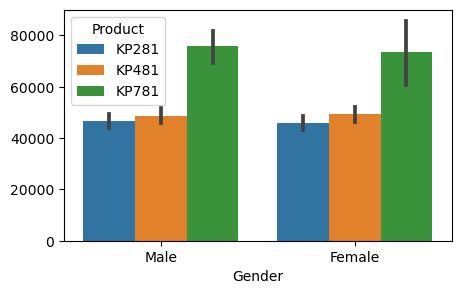

In [19]:
plt.figure(figsize = (5,3))

sns.barplot(df,y = 'Income',x = 'Gender',hue = 'Product')
plt.ylabel('')

plt.show()

### Observations

Product:
1. Product KP281 is used by equal number of Males and Females
2. Product KP481 is slightly more used by Males.
3. Product KP781 is mostly used by Males.

Fitness:
1. Most of the Customers who have excellent level of fitness use KP781 Product
2. Most of the Customers who have an average level of fitness use KP281 Product

Usagee:
1. Customers who try to use the product more than 4 times a week prerfer KP781 Product
2. Customers who use the product for at most 4 times prefer KP281 product
3. Males tend to use the Product for 3 to 4 times a week
4. Females tend to use the Product for 2 to 3 times a week


Education:
1. Most of the Customers who have had education for more thatn 16 years prefer the KP781 Product
2. Customers having at most 16 years of education prefer the KP281 Product followed by KP481.

Income:
1. Most of the Customers who have high income prefer to use KP781

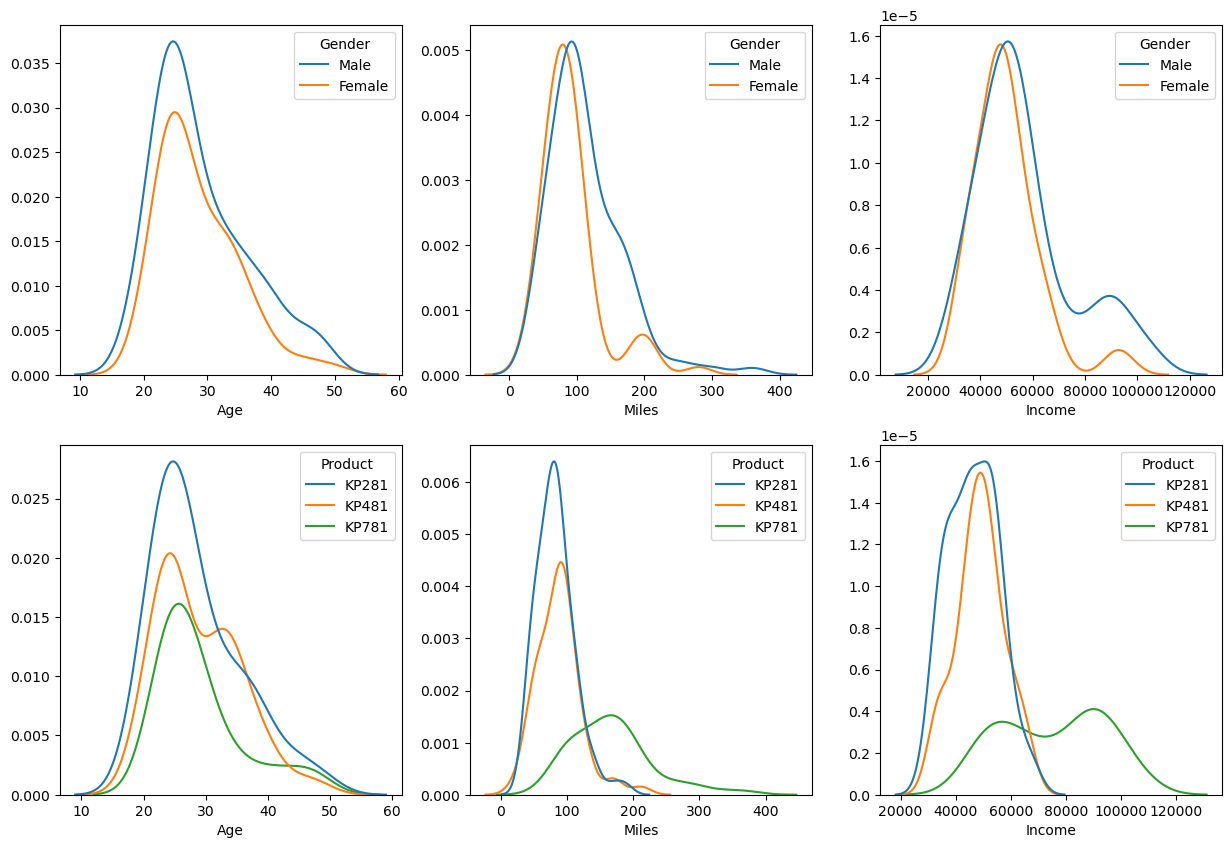

In [20]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.kdeplot(data = df, x= 'Age',hue = 'Gender')
# sns.lineplot(x = [24,24],y = [0,37],color = 'red',estimator=None,linewidth = 1.5)
plt.ylabel('')


plt.subplot(2,3,2)
sns.kdeplot(data = df, x= 'Miles',hue = 'Gender')
plt.ylabel('')

plt.subplot(2,3,3)
sns.kdeplot(data = df, x= 'Income',hue = 'Gender')
plt.ylabel('')


plt.subplot(2,3,4)
sns.kdeplot(data = df, x= 'Age',hue = 'Product')
# sns.lineplot(x = [24,24],y = [0,37],color = 'red',estimator=None,linewidth = 1.5)
plt.ylabel('')


plt.subplot(2,3,5)
sns.kdeplot(data = df, x= 'Miles',hue = 'Product')
plt.ylabel('')

plt.subplot(2,3,6)
sns.kdeplot(data = df, x= 'Income',hue = 'Product')
plt.ylabel('')


plt.show()

## Pair Plot

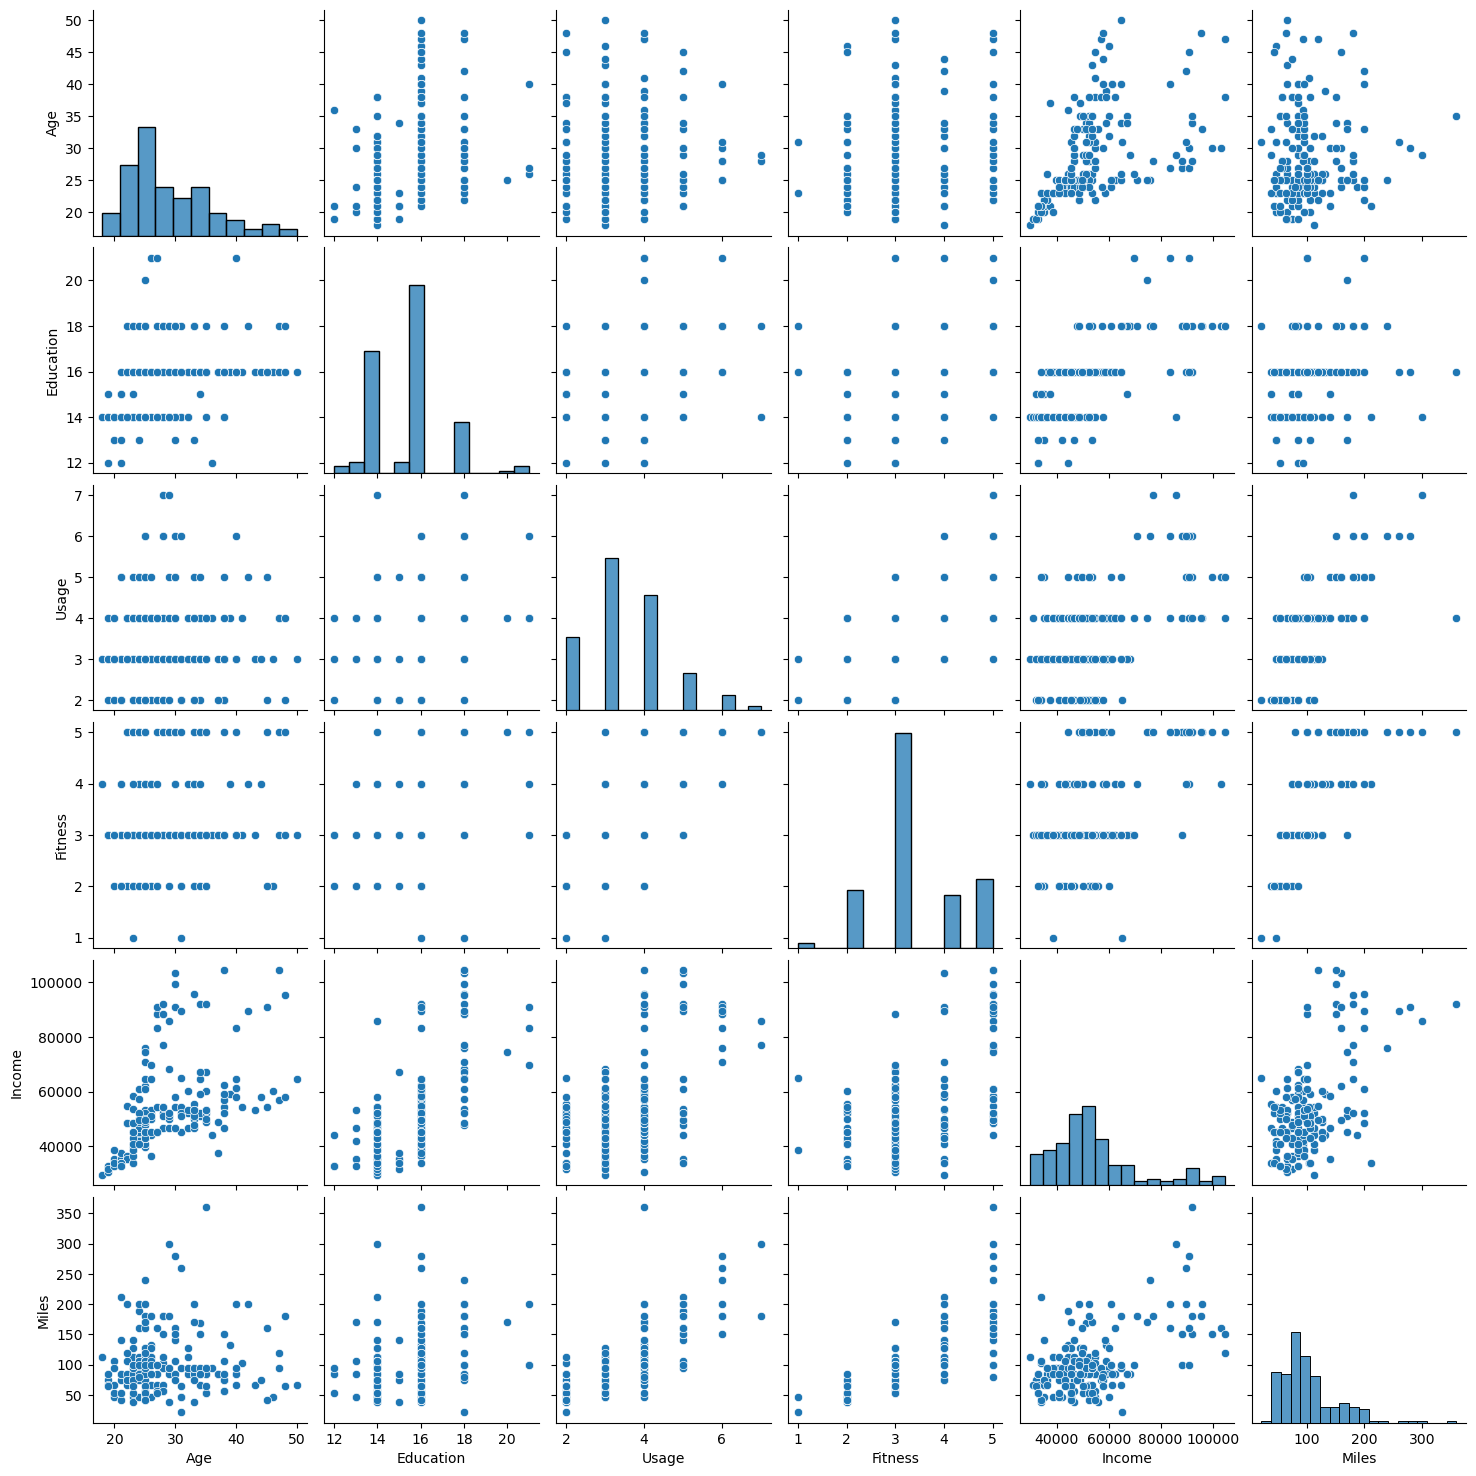

In [21]:
sns.pairplot(df)
plt.show()

## Correlation

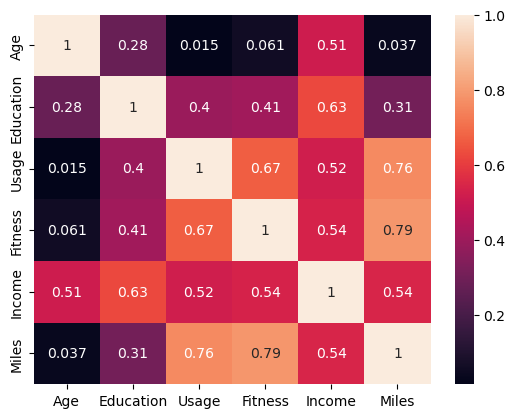

In [22]:
sns.heatmap(df.corr(),annot= True)
plt.show()

### Observations
1. Miles and Fitness and Usage has high correlation

# 4. Missing Value & Outlier Detection


In [23]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is no `Null` count.




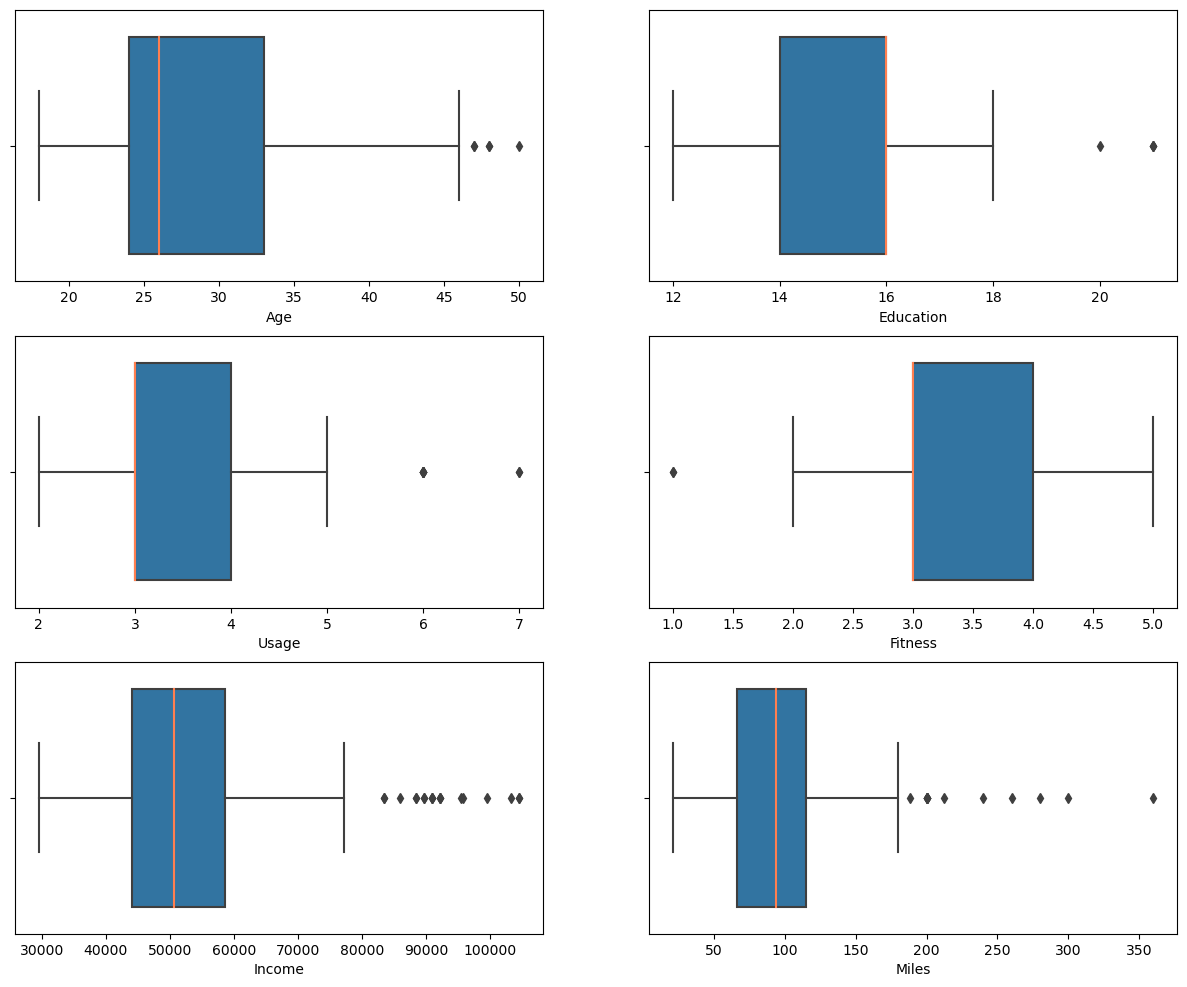

In [24]:
plt.figure(figsize = (15,12))

plt.subplot(3,2,1)
sns.boxplot(df,x = 'Age', medianprops={"color": "coral"})

plt.subplot(3,2,2)
sns.boxplot(df,x = 'Education',  medianprops={"color": "coral"})

plt.subplot(3,2,3)
sns.boxplot(df,x = 'Usage',  medianprops={"color": "coral"})

plt.subplot(3,2,4)
sns.boxplot(df,x = 'Fitness',  medianprops={"color": "coral"})

plt.subplot(3,2,5)
sns.boxplot(df,x = 'Income',  medianprops={"color": "coral"})

plt.subplot(3,2,6)
sns.boxplot(df,x = 'Miles',  medianprops={"color": "coral"})



plt.show()

### Observations
1. We are able to see a lot of Outliers of Income and Miles, Other Columns have less Outliers

### Distributing Income, Age and Miles to bins

In [25]:
df['income_class'] = pd.cut(
                            df['Income'],\
                            bins = [20000,35000,50000,65000,80000,120000],\
                            labels = ['low','below avg','avg','above avg','high']
                           )

df['age_class'] = pd.cut(df['Age'], bins = [16,20,26,33,39,45,51])

df['miles_class'] = pd.cut(df['Miles'],bins = [1,40,80,120,160,200,500])


# Marginal Probability

In [26]:
#function to calcuate Marginal Probability
def print_marginal_probability(df,i):
    dum = round((df[i].value_counts(normalize = True).sort_index()* 100),2).reset_index()
    print(bold_text(i.upper()+':'))
    for j in range(len(dum)):
        print(f'Marginal Probabilty for {dum.loc[j,"index"]} value in {i} column is {dum.loc[j,i]}%')
    print()


In [27]:
col_list = ['Gender','Education','MaritalStatus','Usage','Fitness','income_class','age_class','miles_class']
for i in col_list:
    print_marginal_probability(df,i)


GENDER:
Marginal Probabilty for Female value in Gender column is 42.22%
Marginal Probabilty for Male value in Gender column is 57.78%

EDUCATION:
Marginal Probabilty for 12 value in Education column is 1.67%
Marginal Probabilty for 13 value in Education column is 2.78%
Marginal Probabilty for 14 value in Education column is 30.56%
Marginal Probabilty for 15 value in Education column is 2.78%
Marginal Probabilty for 16 value in Education column is 47.22%
Marginal Probabilty for 18 value in Education column is 12.78%
Marginal Probabilty for 20 value in Education column is 0.56%
Marginal Probabilty for 21 value in Education column is 1.67%

MARITALSTATUS:
Marginal Probabilty for Partnered value in MaritalStatus column is 59.44%
Marginal Probabilty for Single value in MaritalStatus column is 40.56%

USAGE:
Marginal Probabilty for 2 value in Usage column is 18.33%
Marginal Probabilty for 3 value in Usage column is 38.33%
Marginal Probabilty for 4 value in Usage column is 28.89%
Marginal Pro

# Conditional Probability

In [28]:
i = 'Gender'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print('Probability of buying KP281, given the customer is a',dum.loc[row,i],'is:',f'{dum.loc[row,"KP281"]}%')
    print('Probability of buying KP481, given the customer is a',dum.loc[row,i],'is:',f'{dum.loc[row,"KP481"]}%')
    print('Probability of buying KP781, given the customer is a',dum.loc[row,i],'is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer is a Female is: 52.63%
Probability of buying KP481, given the customer is a Female is: 38.16%
Probability of buying KP781, given the customer is a Female is: 9.21%

Probability of buying KP281, given the customer is a Male is: 38.46%
Probability of buying KP481, given the customer is a Male is: 29.81%
Probability of buying KP781, given the customer is a Male is: 31.73%



In [29]:
i = 'Education'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer had {dum.loc[row,i]} years of Education','is:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer had {dum.loc[row,i]} years of Education','is:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer had {dum.loc[row,i]} years of Education','is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer had 12 years of Education is: 66.67%
Probability of buying KP481, given the customer had 12 years of Education is: 33.33%
Probability of buying KP781, given the customer had 12 years of Education is: 0.0%

Probability of buying KP281, given the customer had 13 years of Education is: 60.0%
Probability of buying KP481, given the customer had 13 years of Education is: 40.0%
Probability of buying KP781, given the customer had 13 years of Education is: 0.0%

Probability of buying KP281, given the customer had 14 years of Education is: 54.55%
Probability of buying KP481, given the customer had 14 years of Education is: 41.82%
Probability of buying KP781, given the customer had 14 years of Education is: 3.64%

Probability of buying KP281, given the customer had 15 years of Education is: 80.0%
Probability of buying KP481, given the customer had 15 years of Education is: 20.0%
Probability of buying KP781, given the customer had 15 years of Educati

In [30]:
i = 'MaritalStatus'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer is {dum.loc[row,i]} is:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer is {dum.loc[row,i]} is:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer is {dum.loc[row,i]} is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer is Partnered is: 44.86%
Probability of buying KP481, given the customer is Partnered is: 33.64%
Probability of buying KP781, given the customer is Partnered is: 21.5%

Probability of buying KP281, given the customer is Single is: 43.84%
Probability of buying KP481, given the customer is Single is: 32.88%
Probability of buying KP781, given the customer is Single is: 23.29%



In [31]:
i = 'Usage'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer uses the Product {dum.loc[row,i]} times a week is:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer uses the Product {dum.loc[row,i]} times a week is:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer uses the Product {dum.loc[row,i]} times a week is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer uses the Product 2 times a week is: 57.58%
Probability of buying KP481, given the customer uses the Product 2 times a week is: 42.42%
Probability of buying KP781, given the customer uses the Product 2 times a week is: 0.0%

Probability of buying KP281, given the customer uses the Product 3 times a week is: 53.62%
Probability of buying KP481, given the customer uses the Product 3 times a week is: 44.93%
Probability of buying KP781, given the customer uses the Product 3 times a week is: 1.45%

Probability of buying KP281, given the customer uses the Product 4 times a week is: 42.31%
Probability of buying KP481, given the customer uses the Product 4 times a week is: 23.08%
Probability of buying KP781, given the customer uses the Product 4 times a week is: 34.62%

Probability of buying KP281, given the customer uses the Product 5 times a week is: 11.76%
Probability of buying KP481, given the customer uses the Product 5 times a week is: 17.65%

In [32]:
i = 'Fitness'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer has {dum.loc[row,i]} level of Fitness is:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer has {dum.loc[row,i]} level of Fitness is:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer has {dum.loc[row,i]} level of Fitness is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer has 1 level of Fitness is: 50.0%
Probability of buying KP481, given the customer has 1 level of Fitness is: 50.0%
Probability of buying KP781, given the customer has 1 level of Fitness is: 0.0%

Probability of buying KP281, given the customer has 2 level of Fitness is: 53.85%
Probability of buying KP481, given the customer has 2 level of Fitness is: 46.15%
Probability of buying KP781, given the customer has 2 level of Fitness is: 0.0%

Probability of buying KP281, given the customer has 3 level of Fitness is: 55.67%
Probability of buying KP481, given the customer has 3 level of Fitness is: 40.21%
Probability of buying KP781, given the customer has 3 level of Fitness is: 4.12%

Probability of buying KP281, given the customer has 4 level of Fitness is: 37.5%
Probability of buying KP481, given the customer has 4 level of Fitness is: 33.33%
Probability of buying KP781, given the customer has 4 level of Fitness is: 29.17%

Probability of buyin

In [33]:
i = 'income_class'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer belongs to {dum.loc[row,i]} income class:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer belongs to {dum.loc[row,i]} income class:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer belongs to {dum.loc[row,i]} income class:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer belongs to low income class: 57.14%
Probability of buying KP481, given the customer belongs to low income class: 42.86%
Probability of buying KP781, given the customer belongs to low income class: 0.0%

Probability of buying KP281, given the customer belongs to below avg income class: 57.97%
Probability of buying KP481, given the customer belongs to below avg income class: 34.78%
Probability of buying KP781, given the customer belongs to below avg income class: 7.25%

Probability of buying KP281, given the customer belongs to avg income class: 43.48%
Probability of buying KP481, given the customer belongs to avg income class: 40.58%
Probability of buying KP781, given the customer belongs to avg income class: 15.94%

Probability of buying KP281, given the customer belongs to above avg income class: 22.22%
Probability of buying KP481, given the customer belongs to above avg income class: 22.22%
Probability of buying KP781, given the custome

In [34]:
i = 'age_class'
dum = round((pd.crosstab(index = df[i],columns = df['Product'],normalize = 'index')*100),2).reset_index()
dum.columns.name = None
rows = dum.shape[0]
for row in range(len(dum)):
    print(f'Probability of buying KP281, given the customer belongs to {dum.loc[row,i]} age class is:',f'{dum.loc[row,"KP281"]}%')
    print(f'Probability of buying KP481, given the customer belongs to {dum.loc[row,i]} age class is:',f'{dum.loc[row,"KP481"]}%')
    print(f'Probability of buying KP781, given the customer belongs to {dum.loc[row,i]} age class is:',f'{dum.loc[row,"KP781"]}%')
    print()

Probability of buying KP281, given the customer belongs to (16, 20] age class is: 60.0%
Probability of buying KP481, given the customer belongs to (16, 20] age class is: 40.0%
Probability of buying KP781, given the customer belongs to (16, 20] age class is: 0.0%

Probability of buying KP281, given the customer belongs to (20, 26] age class is: 43.21%
Probability of buying KP481, given the customer belongs to (20, 26] age class is: 33.33%
Probability of buying KP781, given the customer belongs to (20, 26] age class is: 23.46%

Probability of buying KP281, given the customer belongs to (26, 33] age class is: 42.55%
Probability of buying KP481, given the customer belongs to (26, 33] age class is: 29.79%
Probability of buying KP781, given the customer belongs to (26, 33] age class is: 27.66%

Probability of buying KP281, given the customer belongs to (33, 39] age class is: 48.0%
Probability of buying KP481, given the customer belongs to (33, 39] age class is: 40.0%
Probability of buying KP

In [35]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'income_class', 'age_class',
       'miles_class'],
      dtype='object')

# 5. Business Insights

Product:
1. Only Half of the Customers that use KP281 use KP781.
2. 4/9th, 3/9th, 2/9th are the number of records for KP281, KP481 and KP781 respectively.
3. Product KP281 is used by equal number of Males and Females
4. Product KP481 is slightly more used by Males.
5. Product KP781 is mostly used by Males.

Gender:
1. Most of the Customers are Males, Female to Male ratio is around 73%.

Age:
1. Customers from 18 to 50 years of age use these Products.
2. Maximum Customers are of 24 to 33 years to old.
3. 45% of Customers are early twenties.

Education:
1. Customers using these Products have 12 to 21 years of Education.
2. Most of the Customers had Education 12 to 16 years of Education.
3. Highest number of Customers had 16 years followed by 14 years of Education.
4. Most of the Customers who have had education for more thatn 16 years prefer the KP781 Product
5. Customers having less than 16 years of education prefer the KP281 Product followed by KP481.

Marital Status:
1. Most of the Customers are Partnered

Usage:
1. Customers to use these Products 2 to 7 times a week.
2. Most of the Customers plan to use the Products either 3 or 4 times a week.
1. Customers who use the product more than 4 times a week prerfer KP781 treadmill.
2. Customers who use the product for less than 4 times prefer KP281 treadmill.
3. Males tend to use the Product for 3 to 4 times a week
4. Females tend to use the Product for 2 to 3 times a week


Fitness:
1. Customers using these Products have Fitness level 1-5, 5 being excellent and 1 being poor fitness.
2. Most of the Customers have 3-4 level of Fitness.
3. 1/6th of the Customers in this dataset are in excellent shape.
4. Most of the Customers who have excellent level of fitness use KP781 Product
5. Most of the Customers who have an average level of fitness use KP281 Product

Income:
1. Customers using these Products have approx Income band of 30k to 105k.
2. Most of the Customers lie in the 44k to 59k Income band.
3. Most of the Customers who have high income prefer to use KP781

Miles
1. Customers using these Products expect to walk 21 to 360 Miles.
2. Most of the Customers expect to walk within 66 to 115 Miles.

General Observations:
1. All the Numerical Variables are Postively Skewed





# 6. Recommendations

1. As KP281 is popular among average fitness levels and is of budget price. We should Focus more on affordability and simplicity when marketing this product. This product can be targeted for individuals or for a family.
2. As KP281 is used for shorter distances and for less than 4 times a week, it should highlight ease of use and compact design.
2. The target audience for KP481 should be Male customers who are a bit more consious about their fitness level, as this product is  popular among Males having more than average fitness.
3. As KP781 is preferred by customers having excellent fitness and high income. While marketing we should consider highlight new technological/advanced features and high quality aspect of this Product. This can be targeted at Gyms, State of the art Fitness Centers, Atheletic Clubs, etc. ...
4. As K781 is used for higher distances, durability, comfort and high quality should be its highlight.
4. Since most of the Customers are Partnered, we should focus on the Interface which will attract both Males and Females.
